In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rod
import positionVerlet2nd as verlet
from povray_scripts import dump_snake

# Initialize rod

In [33]:
nelem = 10
x = np.linspace(0.,1.,nelem+1)
externalForce = 0.001
yng_mod = 10.
shr_mod = 2.
gamma = 0.05

ri = np.array([[i,0.,0.] for i in x])
f = np.array([[0.,0.,0.] for i in range(nelem+1)])
f[-1,0] = externalForce

theRod = rod.rod(n=nelem, r=ri, rho=1., yng_mod=yng_mod, shr_mod=shr_mod, f_ext=f ,gamma=gamma)

## Set boundary conditions

In [34]:
def dirichletBC(my_rod, my_time):
    my_rod.v[0] = 0.0 * my_rod.v[0]

## Initialize time stepper

In [35]:
rodRun = verlet.positionVerlet2nd(theRod, dirichletBC)

<IPython.core.display.Javascript object>


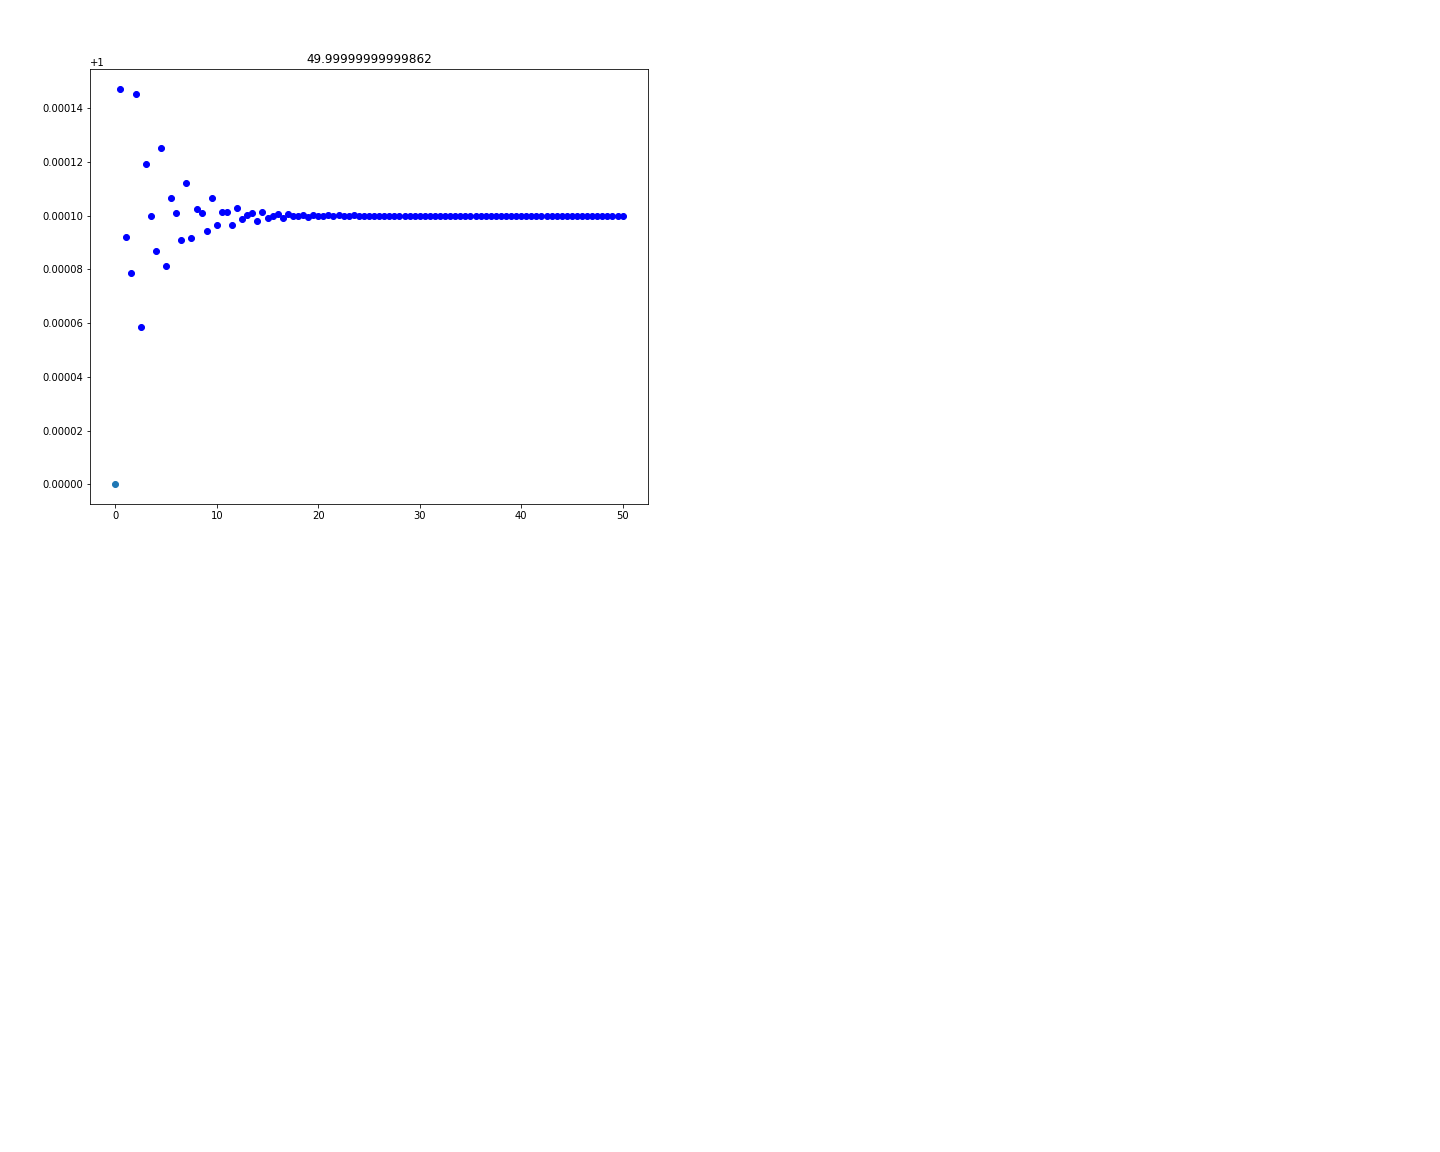

In [36]:
%matplotlib inline
plot = True
dump_povray = False

my_dt = 1.0e-1 * 1. / nelem
t = 0.0
t_end = 50.0
tstep  = 0
tot_it = t_end / my_dt

prefix = "./data/stretch/"

rodlength = []

if plot:
    %matplotlib notebook
    plt.ion()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.plot(0., theRod.r[-1,0], 'o')

while t < t_end:
    
    rodRun.step(my_dt)
    t = t + my_dt
    tstep += 1
    
    if tstep % 50 == 0:
        if dump_povray:
            dump_snake.dump_snake_to_povray(tstep, theRod.r, np.average(theRod.radii), prefix)
        if plot: 
            ax.plot(t, theRod.r[-1,0], 'bo')
            ax.set_title(t)
            fig.canvas.draw()
            
    rodlength.append(np.sum(theRod.l))

%matplotlib inline

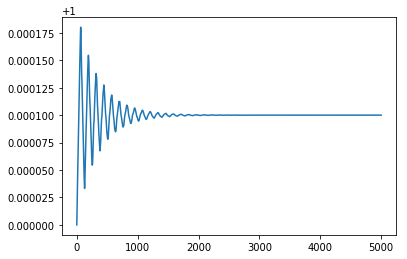

In [7]:
plt.plot(rodlength, '')
tot_it = t_end / my_dt

/Users/fchan5/Applications/miniconda3/envs/ethereal/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0.3, 0.9, 'F = 0.001 N, E = 10.0 Pa, G = 2.0 Pa, $\\gamma$ = 0.05, dt = 0.01')

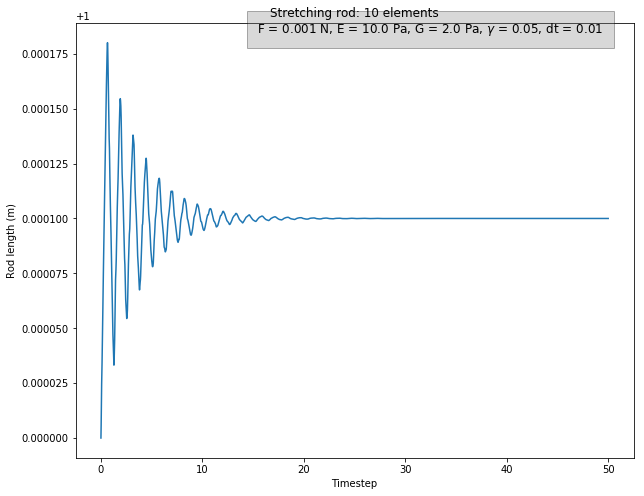

In [71]:
%matplotlib inline
import seaborn as sns
color = sns.cubehelix_palette(tot_it)
fig2 = plt.figure(figsize=(10, 8))
bx = fig2.add_subplot(111)
bx.plot(np.linspace(0.,t_end,tot_it+1), rodlength, '-', linewidth=1.5, label='Simulation')
bx.set_title('Stretching rod: {} elements'.format(nelem))
bx.set_xlabel('Timestep')
bx.set_ylabel('Rod length (m)')
simParam = r"F = {} N, E = {} Pa, G = {} Pa, $\gamma$ = {}, dt = {}".format(externalForce, yng_mod, shr_mod, gamma, my_dt)
bx.text(0.3, 0.9, simParam, transform=ax.transAxes, fontsize=12,  bbox={'facecolor':'grey', 'alpha':0.3, 'pad':10})

In [72]:
fig2.savefig('stretch.eps', dpi=1200)